<h2> 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!</h2>

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [4]:
#1.데이터 가져오기 .. 이과정에서 기존 df 설정을 data와 target을 모두 가져왔으므로 열에서 :-1을 쓴다
df_X = df.values[:,:-1]
df_y = df.target
df_X.shape

(442, 10)

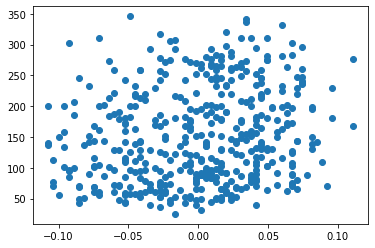

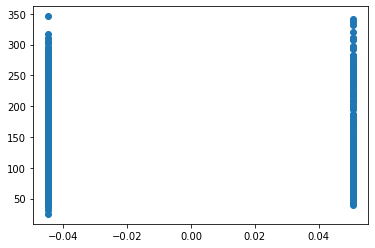

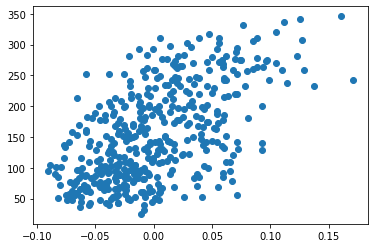

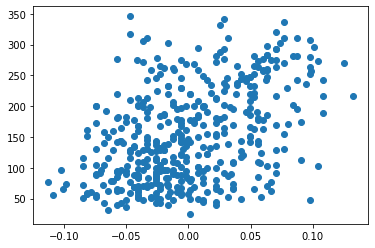

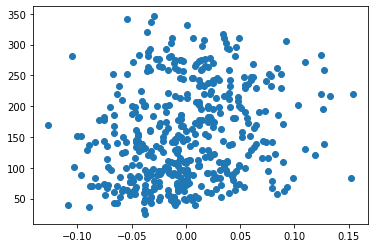

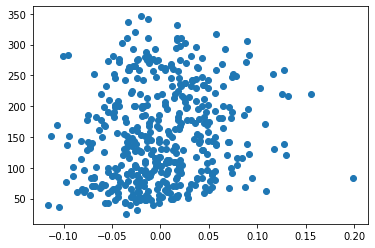

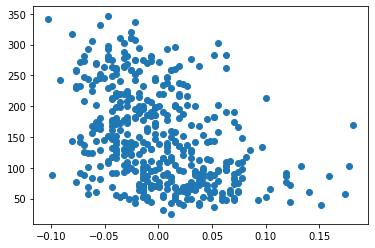

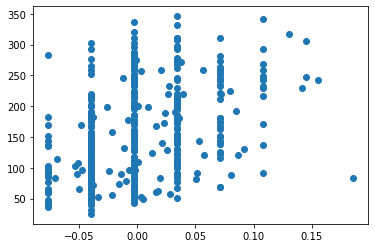

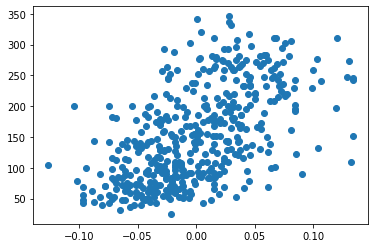

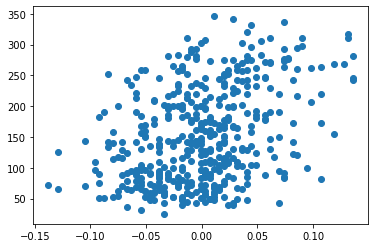

In [5]:
#먼저 plt.scatter을 통해 각 특성별로 나타나는 산포도를 확인해보자 
for i in range(len(df_X[0])):
    plt.scatter(df_X[:,i],df_y)
    plt.show()
#sex데이터는 극단적인 값들이라 포함하지 않는것이 좋아보인다.

In [6]:
df = df.drop(labels=['sex','s4'], axis=1)

In [7]:
df.shape

(442, 9)

In [8]:
df.values

array([[ 3.80759064e-02,  6.16962065e-02,  2.18723550e-02, ...,
         1.99084209e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -5.14740612e-02, -2.63278347e-02, ...,
        -6.83297436e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  4.44512133e-02, -5.67061055e-03, ...,
         2.86377052e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02, -1.59062628e-02,  1.72818607e-02, ...,
        -4.68794828e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02,  3.90621530e-02,  1.21513083e-03, ...,
         4.45283740e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -7.30303027e-02, -8.14137658e-02, ...,
        -4.21985971e-03,  3.06440941e-03,  5.70000000e+01]])

In [9]:
#1.데이터 가져오기
df_X = df.values[:,:-1]
df_y = df.target


In [10]:
#2. 모델에 입력할 데이터 X 준비하기
X = df_X
print(X)
print(X.shape)

[[ 0.03807591  0.06169621  0.02187235 ... -0.04340085  0.01990842
  -0.01764613]
 [-0.00188202 -0.05147406 -0.02632783 ...  0.07441156 -0.06832974
  -0.09220405]
 [ 0.08529891  0.04445121 -0.00567061 ... -0.03235593  0.00286377
  -0.02593034]
 ...
 [ 0.04170844 -0.01590626  0.01728186 ... -0.02499266 -0.04687948
   0.01549073]
 [-0.04547248  0.03906215  0.00121513 ... -0.02867429  0.04452837
  -0.02593034]
 [-0.04547248 -0.0730303  -0.08141377 ...  0.17381578 -0.00421986
   0.00306441]]
(442, 8)


In [11]:
#3. 모델에 에측할 데이터 y 준비하기
y = np.array(df_y) 
print(y)
print(y.shape)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

442개의 데이터와 9개의 열로 이루어진 X, 442개의 데이터로 이루어진 y

In [12]:
#4. train데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X.shape, y.shape)
#모델에는 X_train과 y_train으로 학습하고 X_test로 예측하자.

(353, 8) (89, 8) (353,) (89,)
(442, 8) (442,)


In [14]:
y_train

array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
       178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
       166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
       104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
       208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
       317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
       107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
       175.,  42., 127.,  53.,  94., 104., 199., 265., 281., 248., 257.,
       215., 303., 170.,  59., 277., 209., 138., 198., 124.,  96., 288.,
       225., 265., 101.,  55., 198.,  51., 252.,  64., 220., 131., 212.,
       142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128., 141.,
        48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
       279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97.,
       246., 321., 308., 109.,  69., 182., 258., 16

In [15]:
print(len(data.feature_names))

10


In [16]:
len(df_X[0])

8

In [17]:
len(df_X[:,0])

442

Iteration 100 :Loss 3031.0210
Iteration 200 :Loss 3005.3439
Iteration 300 :Loss 3002.3347
Iteration 400 :Loss 3001.2786
Iteration 500 :Loss 3000.4550
Iteration 600 :Loss 2999.6853
Iteration 700 :Loss 2998.9490
Iteration 800 :Loss 2998.2425
Iteration 900 :Loss 2997.5645
Iteration 1000 :Loss 2996.9136
Iteration 1100 :Loss 2996.2890
Iteration 1200 :Loss 2995.6894
Iteration 1300 :Loss 2995.1139
Iteration 1400 :Loss 2994.5615
Iteration 1500 :Loss 2994.0313
Iteration 1600 :Loss 2993.5224
Iteration 1700 :Loss 2993.0339
Iteration 1800 :Loss 2992.5651
Iteration 1900 :Loss 2992.1151
Iteration 2000 :Loss 2991.6832
2960.249767542859


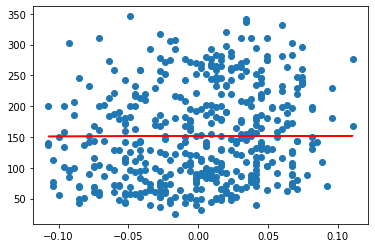

In [18]:
#입력갯수에 맞는 가중치 w와 b 준비
import numpy as np
W = np.random.rand(len(df_X[0]))
b = np.random.rand()
#모델 준비하기 - 학습모델 수식을 통해 
def model(X,W,b):# X*W+b만 하면 현재 상태에서 한가지값만 나타나게 되므로 행렬 값에대해서
    # 한 행에서 가중치와 x들을 곱해서 +b를 해주는 식으로해야함
    #따라서 랜덤으로 정해진 W와 b를 통해 예측된 predictions값을 구하는게 model
    #X_train을 넣었다면 y_train값이 나오도록 해야할것임
    #X_test를 넣었다면 y_test값이 나오도록 해야한다
    #단, w와 b의 값이 최적의 값이 아니기전까진 계속해서 w와 b가 바뀌어야함
    #바뀌는 과정은 여기서 하지 않는다.
    #먼저 predictions의 값을 구해보자.
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
#predictions를 통해 


#MSE  mean squared error 오차 제곱 평균 을 통해 손실함수 계산 - 이걸 줄이는 방식으로 ...
#y_pred와 y_real의 값차이에 제곱, 평균을 구하면 손실Loss를 구한다 (MSE는 Loss를 구하기 위한 손실함수이다.)
def MSE(a,b):
    return ((a-b)**2).mean() 

#loss를 구하기위해 model을 통해 prediction을 구하고, 그 값과 y_real값의 차이 loss를 return한다.
def loss(X,W,b,y): 
    predictions = model(X,W,b) #모델
    return MSE(y, predictions) #Loss 

#gradient에서는 말그대로 기울기를 구하는 것인데
#이 기울기를 구하는 함수는 lim w의 변화량->0  에서 (f(w+w의변화량) - f(w))/w의 변화량 이라 보면 된다
#loss라고 되어있어서 복잡하게 보일수 있으나, 사실상 미분구하는 것은 w이므로 나머지 매개변수값은 무시된다.
#따라서 loss(w)를 f(w)라 생각하고 f(w)의 w에 대한 미분공식을 사용한 것이라 보면 된다
#각 W와 b의 변화량에 초점을 잡고 dW, db를 구했다.

#아래의 gradient는 한 변수에 대해서고
#우리가 해야할것은 다변수에 대해서 해야한다
#def gradient(X,W,b,y):
#    dW = (loss(X,W+0.0001,b,y) - loss(X,W,b,y)) / 0.0001
#    db = (loss(X,W,b+0.0001,y) - loss(X,W,b,y)) / 0.0001
#    return dW, db

# 공식 1/N시그마i->N {y_real-y_pred}**2에 대해서 미분하는 것인데
# W에서는 이는 곧 y_pred에 x값들이 있으므로 1/N * 2 * (-x) * (y_real - y_pred)
# b에서는 이는 곧 y_pred에 x값이 없다 그래서 2 * (y_real - y_pred)의 평균 
# 7. 기울기 구하기

def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    dW = 1/N * 2* X.T.dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db


#8. (하이퍼파라미터) 학습률 정하기
#LEARNING_RATE = 1

#loss의 추이를 살펴보기위해 배열로 저장하고 추후에 출력하게된다.
losses = []

#실제 모든 과정을 이 반복문 안에 반복하게된다.
#dW,db의 기울기를 구하고
# W = W-ng를 통해 각 W,b 가중치값들을 늘리거나 줄이게 된다.
# L에는 바꾼 뒤의 W,b 를 사용한 loss를 구하고 이를 append한다
LEARNING_RATE = 0.1#최적의 학습률이라 생각한다. 근데 뭔가... 이상하다!

#9. 모델 학습하기
for i in range(1, 2001):
    dW , db = gradient(X_train, W, b, y_train)
#    print('dW:',dW,'db: ',db)
    W -= LEARNING_RATE*dW
    b -= LEARNING_RATE*db
    L = loss(X_train,W,b,y_train)
    losses.append(L)
    if i%100 ==0:
        print("Iteration %d :Loss %0.4f" %(i, L))
    
#10. test 데이터에 대한 성능 확인하기   
test_loss = loss(X_test, W,b, y_test)
print(test_loss)
#tesd_loss를 얻은결과 train했을때 얻은 최적w의 loss와 같다

#11. 정답 데이터와 예측한 데이터 시각화하기
# x에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
def model_alpha(X,W,b):
    return X*W+b

j=0
y_pred = model_alpha(df_X[:,j], W[j], b)
plt.scatter(df_X[:,j], df_y)
plt.plot(df_X[:,j], y_pred, color='r')
plt.show()

#scatter로 원래 값 target의 데이터를 출력하고, plot으로 모델이 예측한 데이터를 그렸다.
#for j in  range(0,len(W)):
#    y_pred = model_alpha(df_X[:,j], W[j], b)
#    plt.scatter(df_X[:,j], df_y)
#    plt.plot(df_X[:,j], y_pred, color='r')
#    print(W[j])
#    plt.show()



<H3>회고</H3>
처음에 이 프로젝트를 수행할 때에는 먼저 데이터를 어떻게 준비할지를 생각을 안해서 10개의 특성을 모두 넣고  
다변수 경사하강법을 통해 최적의 w와 b를 구하려 했었다.  

하지만 loss가 생각보다 큰 수라서 이게 아닌가싶어서 다른 방법을 여러번 찾기도 했지만   
모든 측정값의 loss를 측정하는 것이라 2960이라는 수가 나온것 같아 의심하면서도 일단 진행하게 되었다  

그래서 진행하다 column name : sex, s4는 값이 극단적으로 나뉘어있어 제외하게 되었다.
그후 기존에 학습했던 모델 학습방식을 작성해 학습하고, loss 줄이고, 마지막으로 예측값과 정답값의 비교를 하게 되는데

scatter을 통해 정답값을 표현하여 산개되있는 모습을 그리고 그 산포도의 전체적인 동향을
plot을 통해 예측값을 표현하여 직선 하나와 비교하게 되는 모습이 되었다.

for문을 사용해 각 컬럼별로 비교 그래프를 작성해보기도 하였으며, 모두 정답값의 산포도를 잘 따라가는 모습을 확인하였다.

진행을 하면서 이게 맞나? 라는 생각을 자주하게 되었던것 같다.
데이터의 특성상 이렇게 진행되는게 맞는것 같긴 하나 loss를 더 줄일수 있는 방법이 없을까 궁금하다.








<h2>2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?</h2>

<h2>(1) 데이터 가져오기</h2>

터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

https://www.kaggle.com/c/bike-sharing-demand/data 상세확인 가능

In [28]:
import pandas as pd
train = pd.read_csv('~/aiffel/bike_regression/data/train.csv')

<h2>(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기</h2>

https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

In [31]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,00,00


In [30]:
train['year'] = pd.to_datetime(train['datetime']).dt.strftime('%Y')
train['month'] = pd.to_datetime(train['datetime']).dt.strftime('%m')
train['day'] = pd.to_datetime(train['datetime']).dt.strftime('%d')
train['hour'] = pd.to_datetime(train['datetime']).dt.strftime('%H')
train['min'] = pd.to_datetime(train['datetime']).dt.strftime('%M')
train['sec'] = pd.to_datetime(train['datetime']).dt.strftime('%S')
print(train)
                     

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year month day  \
0      14.395     

<h2>(3) year, month, day, hour, minute, second 데이터 개수 시각화하기 </h2>
https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html

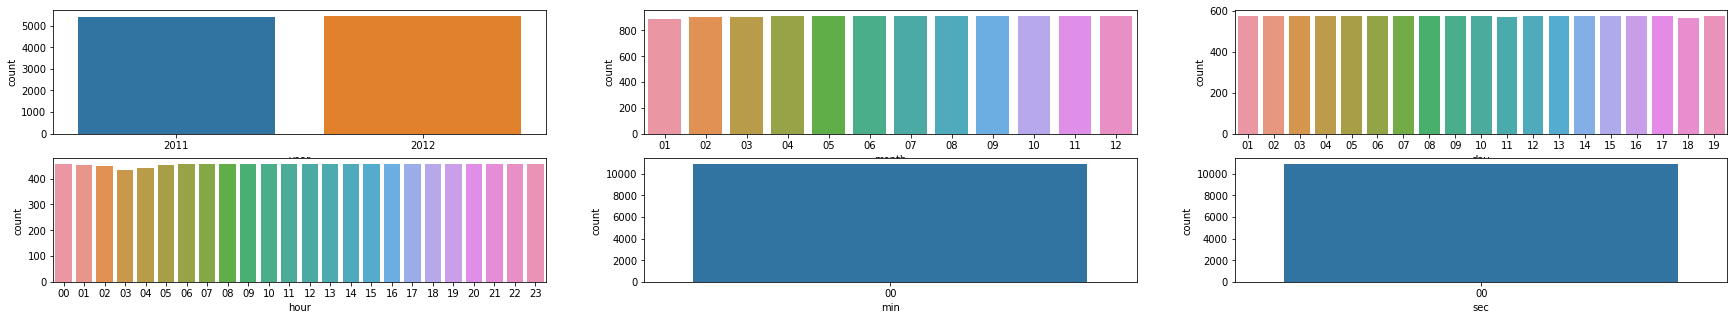

In [32]:
import seaborn as sns
fig, ax = plt.subplots(nrows=2 ,ncols=3, figsize=(30,5))
sns.countplot(x='year', data=train, ax=ax[0][0])
sns.countplot(x='month', data=train, ax=ax[0][1])
sns.countplot(x='day', data=train, ax=ax[0][2])
sns.countplot(x='hour', data=train, ax=ax[1][0])
sns.countplot(x='min', data=train, ax=ax[1][1])
sns.countplot(x='sec', data=train, ax=ax[1][2])
plt.show()
#데이터 중 , min과 sec는 필요없다고 보면 된다. (모든 데이터가 0분, 0초)

<h2>(4) X, y 컬럼 선택 및 train/test 데이터 분리 </h2>

X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [33]:
train
df = pd.DataFrame(train)
df = df.drop(['datetime','season', 'casual', 'registered','count','min','sec'],axis=1)
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,0,0,1,9.84,14.395,81,0.0000,2011,01,01,00
1,0,0,1,9.02,13.635,80,0.0000,2011,01,01,01
2,0,0,1,9.02,13.635,80,0.0000,2011,01,01,02
3,0,0,1,9.84,14.395,75,0.0000,2011,01,01,03
4,0,0,1,9.84,14.395,75,0.0000,2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [34]:
#x,y컬럼 선택은 일단 내용이 월요일 오후 3시다. 
#weather 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
from sklearn.model_selection import train_test_split
#날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
#datetime - hourly date + timestamp  
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#count - number of total rentals 자전거
X = df.values
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2 , random_state = 5)



<h2>(5) LinearRegression 모델 학습</h2>

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)

(2177, 11)
(2177,)


<h2>(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산 </h2>

In [36]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(mse, rmse)

20021.6400905822 141.49784482663404


<h2>(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기</h2>

(10886, 1)
(10886, 1)


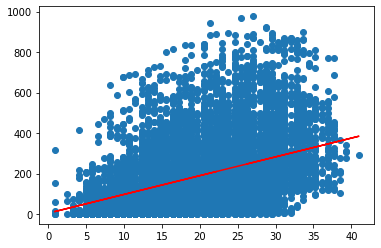

(10886, 1)
(10886, 1)


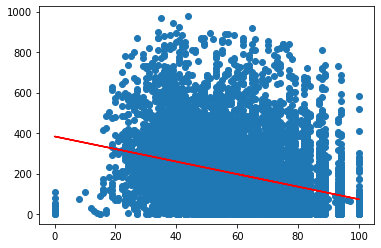

In [37]:
x_a = df['temp']
y_a = pd.DataFrame(train['count'])
x_a = x_a.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x_a,y_a, train_size = 0.2 , random_state = 5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(x_a.shape)
print(y_a.shape)
#model.predict(x_a)


#y_pred_a = model.predict(x_a)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='r')
plt.show()

x_a = df['humidity']
y_a = pd.DataFrame(train['count'])
x_a = x_a.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x_a,y_a, train_size = 0.2 , random_state = 5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(x_a.shape)
print(y_a.shape)
#model.predict(x_a)


#y_pred_a = model.predict(x_a)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='r')
plt.show()

<h2>회고</h2>
힘들었다
